In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [1]:
import torch
import torchvision

print(f"PyTorch version: {torch.__version__}")
print(f"Torchvision version: {torchvision.__version__}")

PyTorch version: 2.0.0
Torchvision version: 0.15.0


In [2]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
else:
    print("Please install GPU version of TF")


Default GPU Device: /device:GPU:0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
directory_path='/content/drive/MyDrive/Colab Notebooks/PFE'
%cd {directory_path}

/content/drive/MyDrive/Colab Notebooks/PFE


In [ ]:
#!git clone https://github.com/tensorflow/models.git

fatal: destination path 'models' already exists and is not an empty directory.


In [5]:
%cd models/research
!protoc object_detection/protos/*.proto --python_out=.
#!git clone https://github.com/cocodataset/cocoapi.git
%cd cocoapi/PythonAPI
!make
%cp -r pycocotools {'/content/drive/MyDrive/Colab\ Notebooks/PFE/models/research'}

/content/drive/MyDrive/Colab Notebooks/PFE/models/research
/content/drive/MyDrive/Colab Notebooks/PFE/models/research/cocoapi/PythonAPI
python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-3.9
creating build/temp.linux-x86_64-3.9/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/local/lib/python3.9/dist-packages/numpy/core/include -I../common -I/usr/include/python3.9 -c ../common/maskApi.c -o build/temp.linux-x86_64-3.9/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not 

In [6]:
pwd

'/content/drive/MyDrive/Colab Notebooks/PFE/models/research/cocoapi/PythonAPI'

### Install the Object Detection API

In [ ]:
%cd ../..
%cp object_detection/packages/tf2/setup.py .
!python -m pip install .
!python object_detection/builders/model_builder_tf2_test.py


Télécharger le model Tensorflow pré-entrainé (efficientdet0)

In [2]:
%cd /home/jovyan/Desktop/TFOD/pretrained_models

/home/jovyan/Desktop/TFOD/pretrained_models


In [3]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xvf efficientdet_d0_coco17_tpu-32.tar.gz
!rm efficientdet_d0_coco17_tpu-32.tar.gz

--2023-04-18 08:24:01--  https://tfhub.dev/tensorflow/efficientdet/d1/1
Resolving tfhub.dev (tfhub.dev)... 172.253.116.138, 172.253.116.102, 172.253.116.101, ...
Connecting to tfhub.dev (tfhub.dev)|172.253.116.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘1’

1                       [ <=>                ]   1.21K  --.-KB/s    in 0s      

2023-04-18 08:24:01 (19.2 MB/s) - ‘1’ saved [1237]



In [10]:
pwd

'/content/drive/MyDrive/Colab Notebooks/PFE/TFOD/pretrained_models'

### Training

In [4]:
%cd /content/drive/MyDrive/Colab Notebooks/PFE/TFOD

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/PFE/TFOD'
/home/jovyan/Desktop/TFOD/pretrained_models


In [ ]:
!python model_main_train_.py --model_dir=models/efficientdet0 --pipeline_config_path=models/efficientdet0/pipeline.config

2023-04-15 16:18:54.380509: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
2023-04-15 16:18:57.824948: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I0415 16:18:57.847482 140243684562752 mirr

In [ ]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path models/retina50/pipeline.config --trained_checkpoint_dir models/retina50 --output_directory exported_models/retina50

2023-04-14 16:43:01.284876: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 16:43:01.340056: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 16:43:02.339545: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned en

Testing model

Loading model...Done! Took 11.590325355529785 seconds
Running inference for /content/drive/MyDrive/Colab Notebooks/PFE/coco_organized/val/images/000000044751.jpg... Done


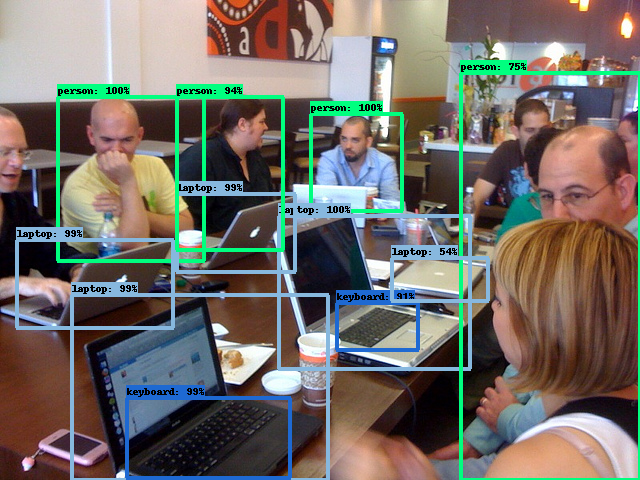

In [ ]:
"""
From TF2 Saved Model
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/Colab Notebooks/PFE/coco_organized/val/images/000000044751.jpg'


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/Colab Notebooks/PFE/TFOD/exported_models/retina50'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/Colab Notebooks/PFE/TFOD/annotations/label_map.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.60)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

# LOAD LABEL MAP DATA FOR PLOTTING

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

# input_tensor = np.expand_dims(image_np, 0)
detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=0.5,
      agnostic_mode=False)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED
